In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IsingModel.Ising2 import IsingGrid

In [2]:
# Test basics
g = IsingGrid(3, 4)
g.constant_init(0, 4, 1)
print(g.energy(-np.ones([3, 4])))
print(g.energy(np.zeros([3, 4])))
print(g.energy(np.random.rand(3, 4)))
g.random_init()
print(g.energy(-np.ones([3, 4])))
print(g.energy(np.zeros([3, 4])))
print(g.energy(np.random.rand(3, 4)))

-20.5
-0.0
-5.8902855079
-6.62830527861
-0.0
0.533420641298


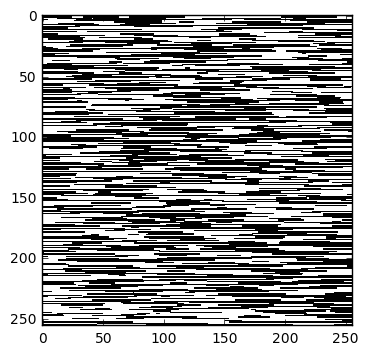

In [3]:
# Test Gibbs sampling
model = IsingGrid(256,256)
model.constant_init(0,0,100)
sample = model.random_grid(0.5)
sample,elist = model.gibbs_sampling(sample)
plt.imshow(sample, interpolation="nearest", cmap=plt.get_cmap('Greys'), vmin=-1, vmax=1)

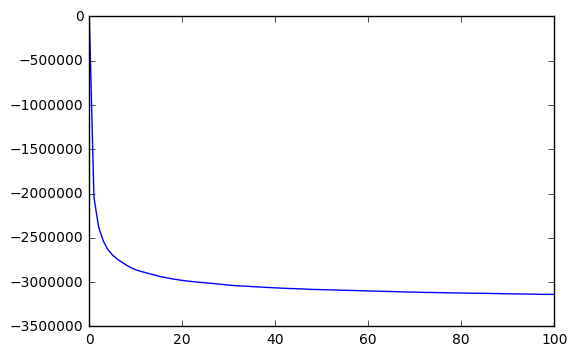

In [4]:
plt.plot(elist)
plt.autoscale(enable=True, axis='both', tight=None)

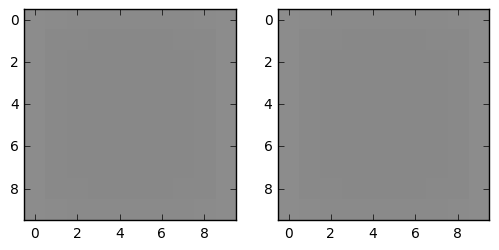

In [5]:
# test meanfield
model = IsingGrid(10,10)
model.constant_init(-3,1,3)
mlist1 = model.meanfields(model.gibbs_sampling(model.random_grid(0.6))[0])
plt.subplot(121)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('Greys'), vmin=-1, vmax=1)

mlist2 = model.meanfields(model.random_grid(0))
plt.subplot(122)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('Greys'), vmin=-1, vmax=1)

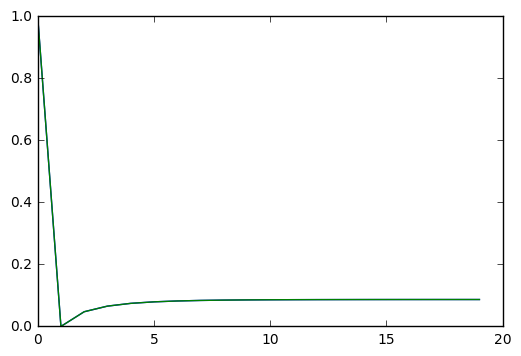

In [6]:
plt.plot(mlist1)
plt.plot(mlist2)

In [7]:
model.gibbs_sampling(model.random_grid(0.4))[0]

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])

In [9]:
def save_video(dirname, video):
    if os.path.exists(dirname):
        return
    else:
        os.makedirs(dirname)
    for t in range(video.shape[0]):
        plt.imshow(video[t], interpolation="nearest", cmap=plt.get_cmap('Greys'), vmin=-1, vmax=1)
        plt.savefig(dirname + "/frame" + str(t).zfill(4)+".png")
    plt.close()

In [14]:
model = IsingGrid(256,256)
model.constant_init(0,.75,.75)
video, elist = model.gibbs_video(model.random_grid(0.9),time_max=100)
save_video("images/video8",video)

In [ ]:
finalenergylist = []
numbiterlist =[]
for a in np.linspace(0.02, 2, 10):
    ising = IsingGrid(n=256, a=a)
    ising.randomflips(.3)
    elist = ising.samplegibbs()
    numbiterlist.append(len(elist))
    finalenergylist.append(int(elist[-1]/a))
    ising.savegrid('im' + str(int(100*a)).zfill(3))

print(numbiterlist)
print(finalenergylist)

In [2]:
model = IsingGrid(10, 10)
model.constant_init(3, 1, 3)
model.loopybelief()
print(model.mean_parameters)

NameError: name 'IsingGrid' is not defined